In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection  import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data sets/diabetes.csv')

The National Institute of Diabetes and Digestive and Kidney Diseases gave this dataset its original source. Based on specific diagnostic metrics included in the dataset, the dataset's goal is to diagnostically predict whether or not a patient has diabetes. These examples were chosen from a bigger database under a number of restrictions. Specifically, every patient here is a female of Pima Indian descent who is at least 21 years old.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.shape

(768, 9)

In [ ]:
print("missing values in the dataset:-")
missing_values = df.isnull().sum()
print(missing_values)

missing values in the dataset:-
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print("duplicate values in the dataset:-")
missing_values = df.duplicated().sum()
print(missing_values)

duplicate values in the dataset:-
0


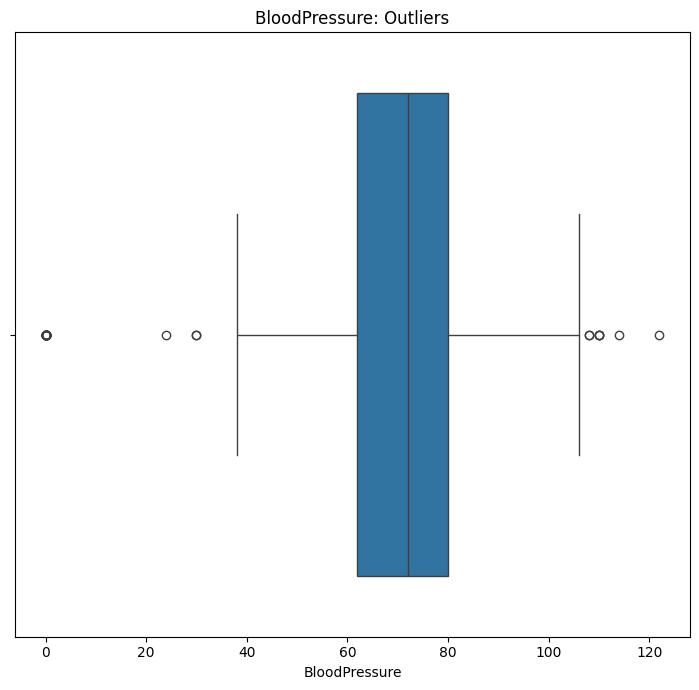

In [ ]:
#outier and boxplot
Q1_score = df['BloodPressure'].quantile(0.25)
Q3_score = df['BloodPressure'].quantile(0.75)
IQR_score = Q3_score - Q1_score

outliers = df[(df['BloodPressure'] < (Q1_score - 1.5 * IQR_score)) |
              (df['BloodPressure'] > (Q3_score + 1.5 * IQR_score))]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['BloodPressure'])
plt.title('BloodPressure: Outliers')
plt.tight_layout()
plt.show()



Text(0, 0.5, 'Count')

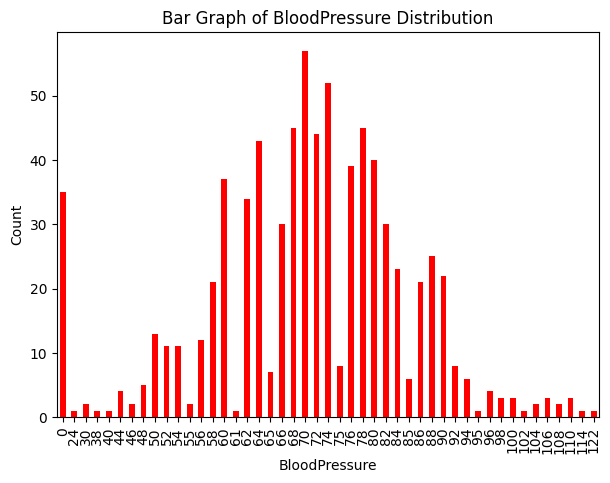

In [ ]:
# Bar graph
plt.figure(figsize=(7, 5))
blood_pressure_counts = df['BloodPressure'].value_counts().sort_index()
blood_pressure_counts.plot(kind='bar', color="red")
plt.title("Bar Graph of BloodPressure Distribution")
plt.xlabel("BloodPressure")
plt.ylabel("Count")

In [ ]:
x=df.drop(columns=['BloodPressure'])
y=df['BloodPressure']

In [ ]:
x.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.7,random_state=42)

In [ ]:
model= LinearRegression()
model.fit(x_scaled,y)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

NameError: name 'model' is not defined